In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
test = pd.read_csv('Translation_Test/test_table.csv', parse_dates = ['date'])
test.head(5)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 22.5+ MB


In [4]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [5]:
user = pd.read_csv('Translation_Test/user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 10.4+ MB


In [7]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [8]:
print('Test Id: ', len(test['user_id'].unique()), ' ', len(test['user_id'].unique()) == len(test))
print('User Id: ', len(user['user_id'].unique()), ' ', len(user['user_id'].unique()) == len(user))

Test Id:  453321   True
User Id:  452867   True


In [9]:
#merge two tables 

data = pd.merge(left = test, right = user, how = 'left', on = 'user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 32.9+ MB


In [11]:
print (data.isnull().sum())

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64


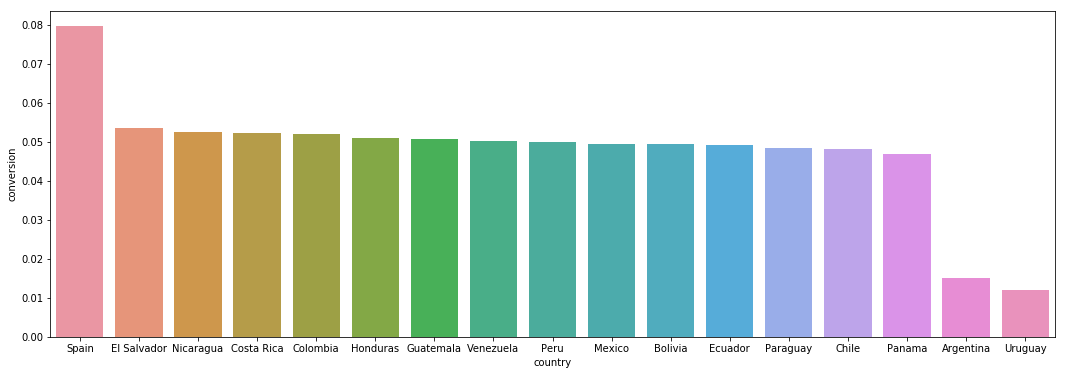

In [12]:
#Visulization of CR in Spain and LatAm countries in old observation
grp_country_old = data[data['test'] == 0][['conversion', 'country']].groupby('country').mean()
grp_country_old =grp_country_old.reset_index()
grp_country_old = grp_country_old.sort_values('conversion', ascending = False)

fig, ax = plt.subplots(figsize = (18 ,6))
sns.barplot(x = 'country', y ='conversion', data = grp_country_old, ax = ax)
plt.show()

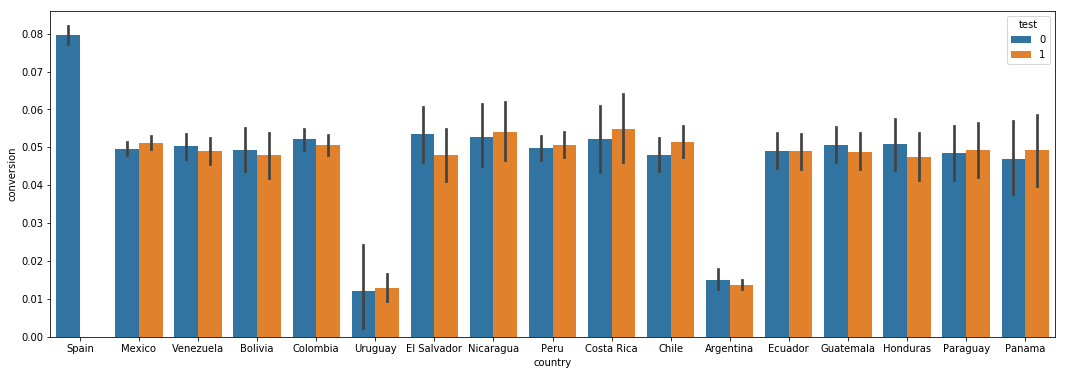

In [13]:
#Visualization of CR compared A/B Test
fig, ax = plt.subplots(figsize = (18, 6))
sns.barplot(x = 'country', y = 'conversion', hue = data['test'], data = data, ax = ax)
plt.show()

In [14]:
test_data = data[data['country'] != 'Spain']
test_val = test_data[test_data['test'] == 1]['conversion'].values
con_val = test_data[test_data['test'] == 0]['conversion'].values

#Using p-value to reject the null hyphothesis of identical average distributions.
#If p value is larger than the threshold, which means two distribution is identical.
#If p value is small, can not reject the null hyphothesis
print (test_val.sum(), con_val.sum(),test_val.mean(), con_val.mean())
print(ttest_ind(test_val, con_val,equal_var = False ))


9379 8968 0.043424713982118966 0.04833042316066309
Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


since p-value is pretty small in the result, it shows the results in A/B test is worse than old version

# Analysis In LatAm Countries

In [15]:
data_lat = data[data['country'] != 'Spain']
data_lat.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


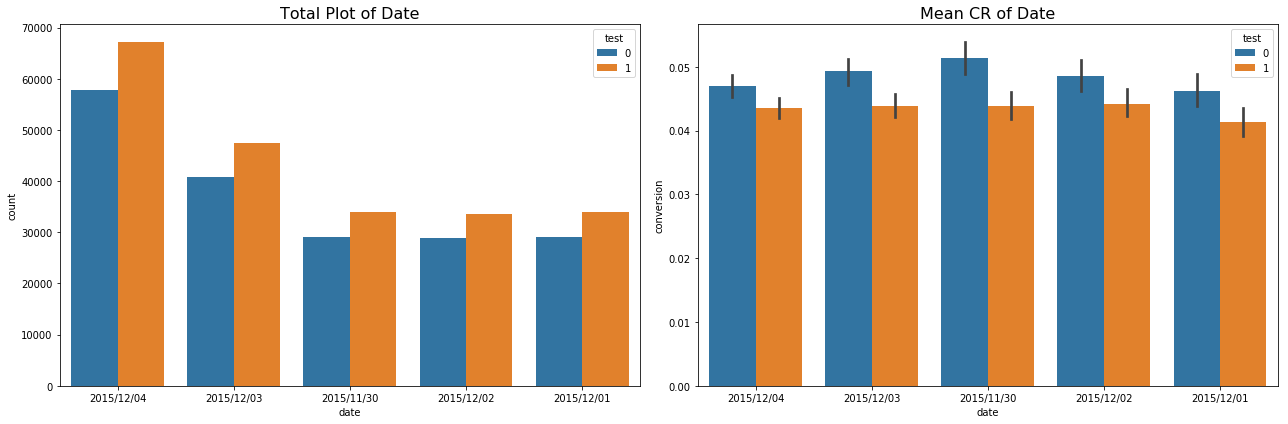

In [16]:
#Visualization of dates
data_lat['date'] = pd.to_datetime(data_lat['date']).apply(lambda x : x.strftime('%Y/%m/%d'))
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'date', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Date', fontsize = 16)

sns.barplot(x = 'date', y ='conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR of Date', fontsize = 16)
plt.tight_layout()
plt.show()

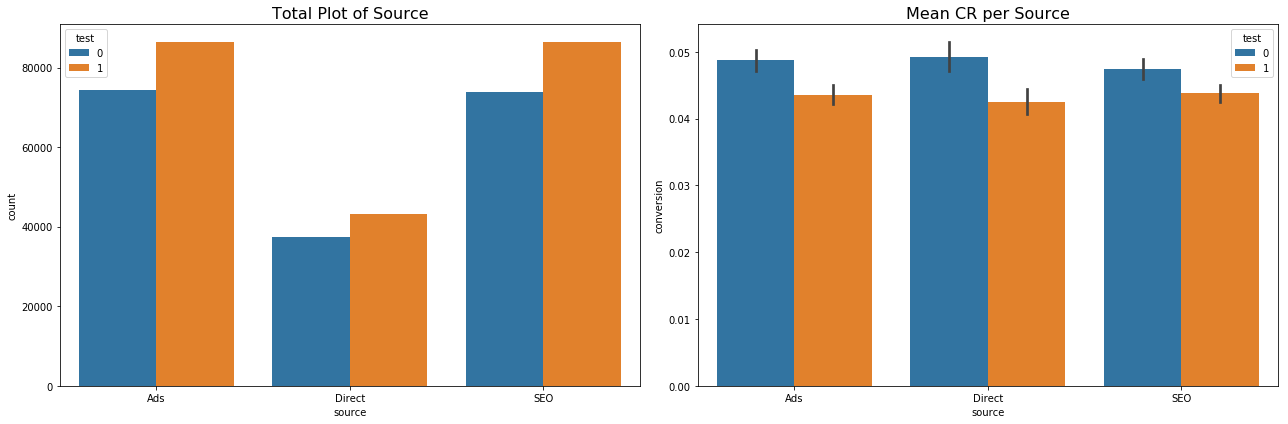

In [17]:
#Visulization of Source
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'source', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Source', fontsize = 16)

sns.barplot(x = 'source', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Source', fontsize = 16)
plt.tight_layout()
plt.show()

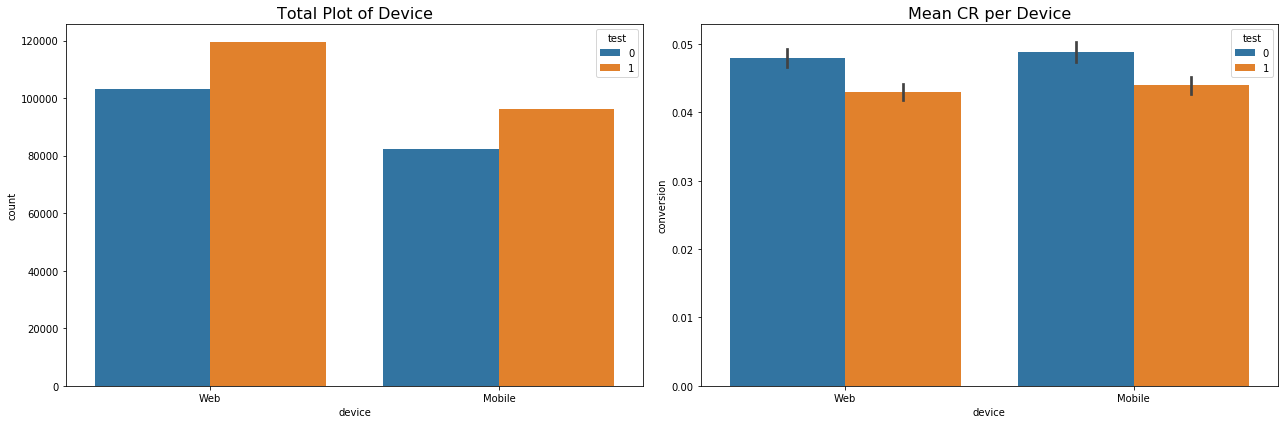

In [18]:
#Visulization of Devices
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'device', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Device', fontsize = 16)

sns.barplot(x = 'device', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Device', fontsize = 16)
plt.tight_layout()
plt.show()

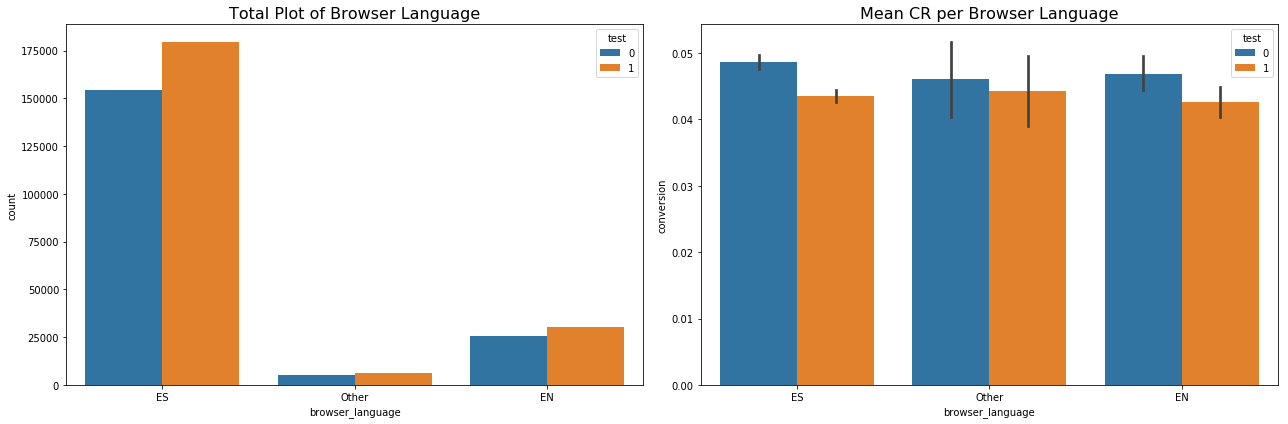

In [19]:
#Visulization of browser language
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'browser_language', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Browser Language', fontsize = 16)

sns.barplot(x = 'browser_language', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Browser Language', fontsize = 16)
plt.tight_layout()
plt.show()

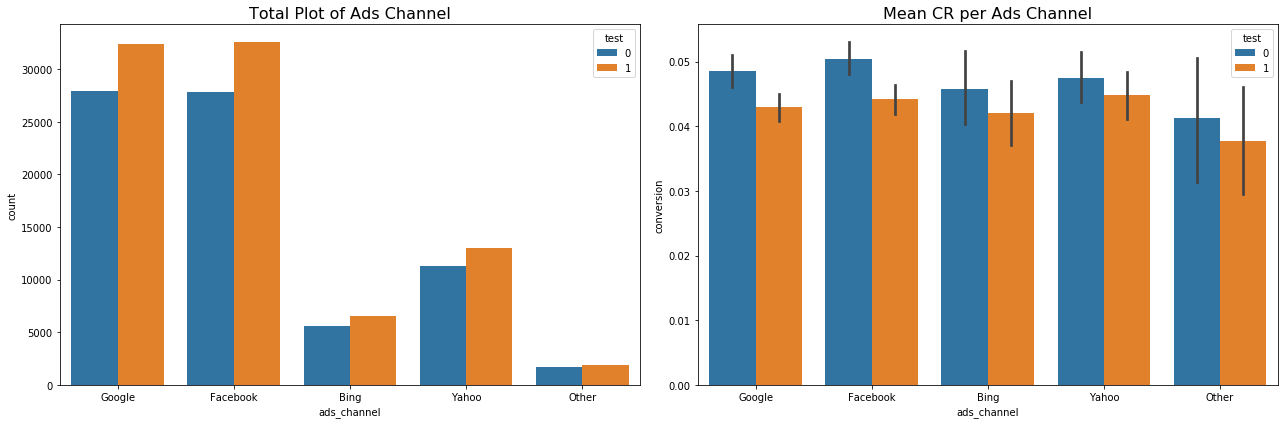

In [20]:
#Visulization of Ads Channel
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'ads_channel', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Ads Channel', fontsize = 16)

sns.barplot(x = 'ads_channel', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Ads Channel', fontsize = 16)
plt.tight_layout()
plt.show()

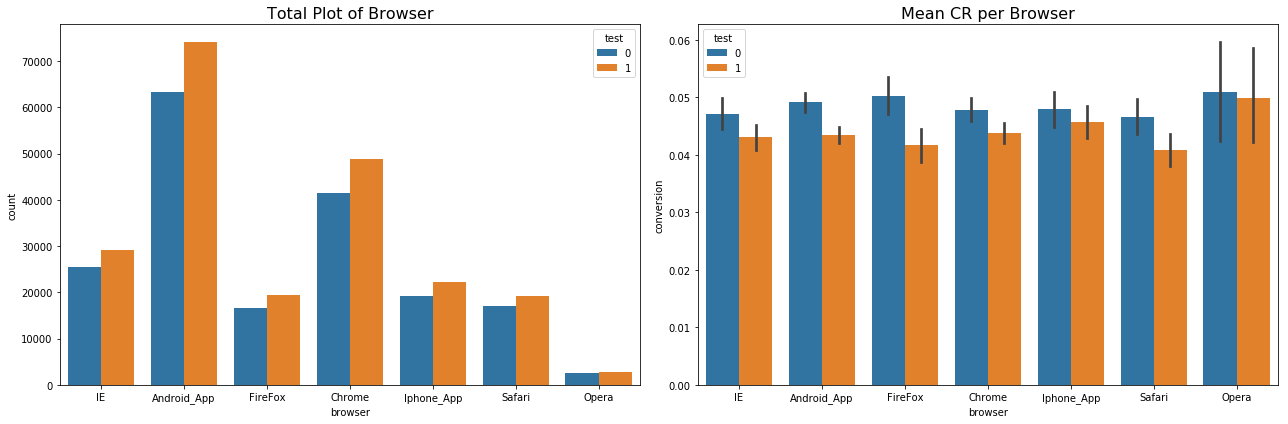

In [21]:
#Visualization of Browser
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'browser', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Browser', fontsize = 16)

sns.barplot(x = 'browser', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Browser', fontsize = 16)
plt.tight_layout()
plt.show()

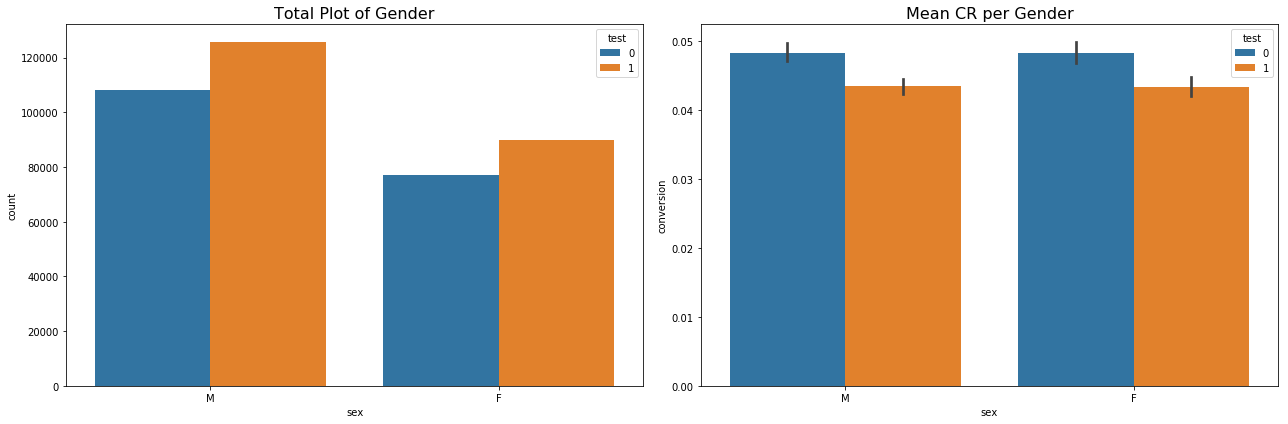

In [22]:
#Visulization of Gender
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))
sns.countplot(x = 'sex', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Gender', fontsize = 16)

sns.barplot(x = 'sex', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Gender', fontsize = 16)
plt.tight_layout()
plt.show()

In [23]:
#Missing Values in Age
data_lat['age'].replace(0, np.NaN)
data_lat['age'].fillna(data_lat['age'].mean(), inplace = True)
data_lat['age'] = data_lat['age'].astype(int)

C:\Users\danyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\danyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\danyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\danyu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarni

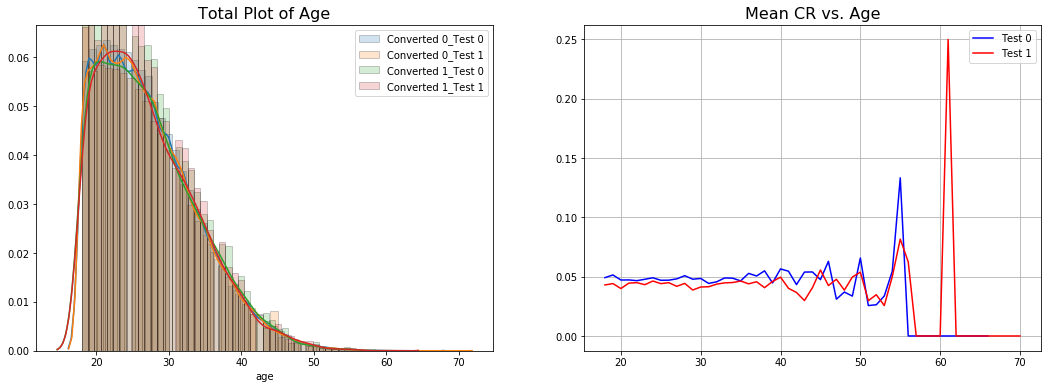

In [24]:
#Visulization of Age
grp_age_0 = data_lat[data_lat['test']==0][['age','conversion']].groupby('age').mean().reset_index()
grp_age_1 = data_lat[data_lat['test']==1][['age','conversion']].groupby('age').mean().reset_index()
hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.distplot(data_lat[data_lat['conversion']==0][data_lat['test']==0]['age'], label = 'Converted 0_Test 0', ax = ax[0], hist_kws = hist_kws)
sns.distplot(data_lat[data_lat['conversion']==0][data_lat['test']==1]['age'], label = 'Converted 0_Test 1', ax = ax[0], hist_kws = hist_kws)
sns.distplot(data_lat[data_lat['conversion']==1][data_lat['test']==0]['age'], label = 'Converted 1_Test 0', ax = ax[0], hist_kws = hist_kws)
sns.distplot(data_lat[data_lat['conversion']==1][data_lat['test']==1]['age'], label = 'Converted 1_Test 1', ax = ax[0], hist_kws = hist_kws)
ax[0].set_title('Total Plot of Age', fontsize =16)
ax[0].legend()

ax[1].plot(grp_age_0['age'], grp_age_0['conversion'],color = 'blue', label = 'Test 0', linestyle = '-')
ax[1].plot(grp_age_1['age'], grp_age_1['conversion'],color = 'red', label = 'Test 1', linestyle = '-')

ax[1].set_title('Mean CR vs. Age', fontsize = 16)
ax[1].grid(True)
ax[1].legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401539 entries, 1 to 453320
Data columns (total 12 columns):
user_id             401539 non-null int64
date                401539 non-null object
source              401539 non-null object
device              401539 non-null object
browser_language    401539 non-null object
ads_channel         160984 non-null object
browser             401539 non-null object
conversion          401539 non-null int64
test                401539 non-null int64
sex                 401085 non-null object
age                 401539 non-null int32
country             401085 non-null object
dtypes: int32(1), int64(3), object(8)
memory usage: 34.0+ MB
None


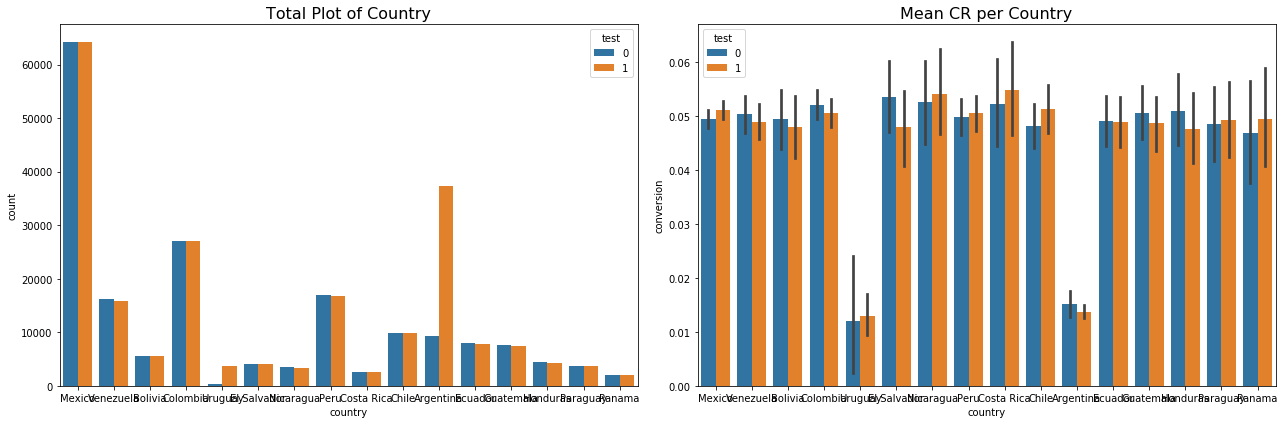

In [25]:
#Visulazation of Country

print(data_lat.info())
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.countplot(x = 'country', hue = 'test', data = data_lat, ax = ax[0])
ax[0].set_title('Total Plot of Country', fontsize = 16)

sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = data_lat, ax = ax[1])
ax[1].set_title('Mean CR per Country', fontsize = 16)
plt.tight_layout()
plt.show()

In [26]:
countries = [name for name in data_lat['country'].unique() if name is not np.nan]

print('{0:15s}{1:>15s}{2:>15s}{3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'p-value'))
print('-' * 65)
for country in countries:
    test_val = data_lat[(data_lat['country'] == country) & (data_lat['test'] == 1)]['conversion'].values
    cont_val = data_lat[(data_lat['country'] == country) & (data_lat['test'] == 0)]['conversion'].values
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var = False).pvalue
    
    print('{0:15s}{1:15.5f}{2:15.5f}{3:10f}'.format(country, test_mean, cont_mean, p_val))

Country              Test Rate   Control Rate   p-value
-----------------------------------------------------------------
Mexico                 0.05119        0.04949  0.165544
Venezuela              0.04898        0.05034  0.573702
Bolivia                0.04790        0.04937  0.718885
Colombia               0.05057        0.05209  0.423719
Uruguay                0.01291        0.01205  0.879764
El Salvador            0.04795        0.05355  0.248127
Nicaragua              0.05418        0.05265  0.780400
Peru                   0.05060        0.04991  0.771953
Costa Rica             0.05474        0.05226  0.687876
Chile                  0.05130        0.04811  0.302848
Argentina              0.01373        0.01507  0.335147
Ecuador                0.04899        0.04915  0.961512
Guatemala              0.04865        0.05064  0.572107
Honduras               0.04754        0.05091  0.471463
Paraguay               0.04923        0.04849  0.883697
Panama                 0.04937        